## Exploratory Data Analysis for Car-Pricing data

### Importing CarPrice-Regression.csv for EDA

In [512]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.simplefilter("ignore")
import missingno as mino

In [513]:
cars = pd.read_csv("CarPrice-Regression.csv")

In [514]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"13,495.0000"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"16,500.0000"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,...,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,"16,500.0000"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,...,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,"13,950.0000"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,...,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,"17,450.0000"


In [515]:
cars.shape

(205, 26)

### Explore types of variables

#### Total number of variables

In [516]:
variables = [col for col in cars.columns]
print('There are {} variables'.format(len(variables)))

There are 26 variables


In [517]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [518]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [520]:
#checking if there is any null value
pd.options.display.max_rows = 100
cars.isnull().sum().sort_values(ascending = False).head(5)

price         0
highwaympg    0
symboling     0
CarName       0
fueltype      0
dtype: int64

In [521]:
cars.isna().values.any()

False

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

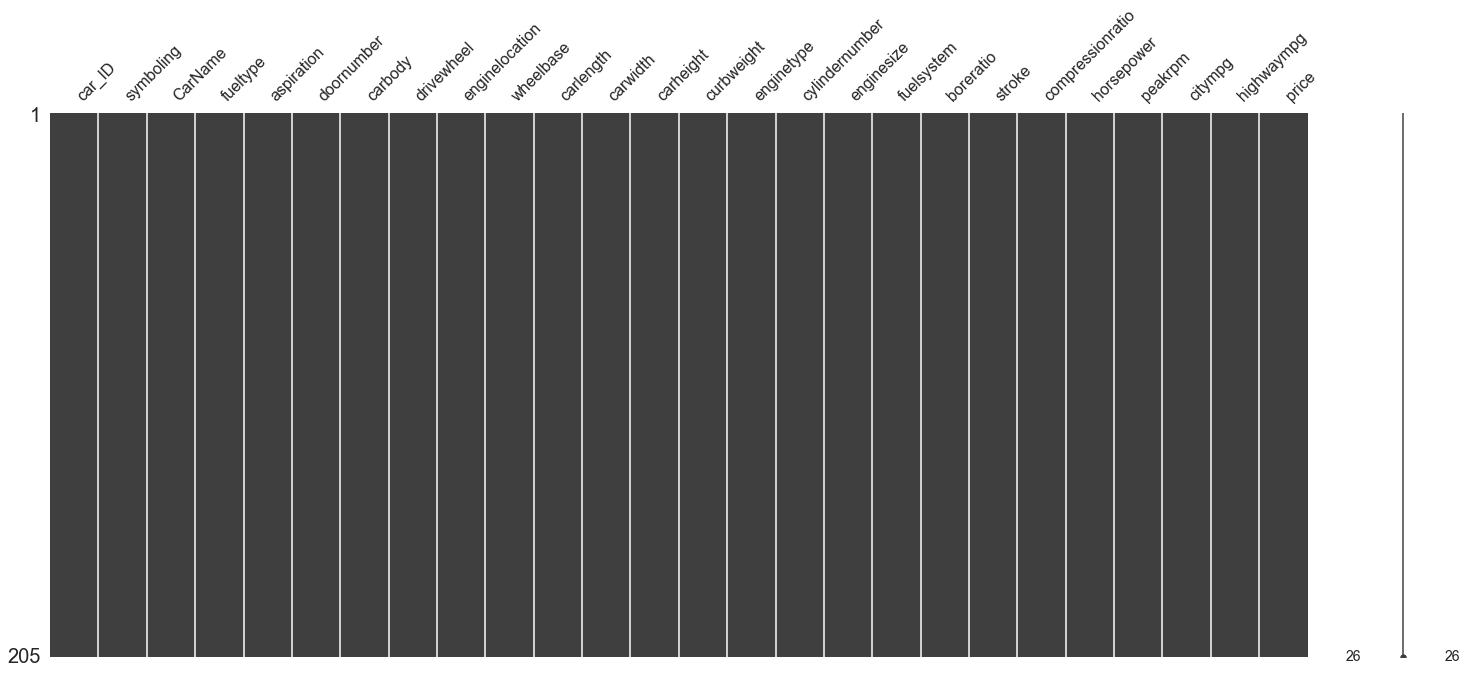

In [655]:
#nullity matrix is a data-dense display which lets you quickly visually 
#pick out patterns in data completion.
plt.figure(figsize=(20,5))
mino.matrix(cars)

#### Total number of numerical variables

In [519]:
numerical = [col for col in cars.columns if cars[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 16 numerical variables


In [522]:
cars[numerical].head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,"13,495.0000"
1,2,3,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,"16,500.0000"
2,3,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,"16,500.0000"
3,4,2,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,"13,950.0000"
4,5,2,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,"17,450.0000"


In [523]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0000,103.0000,59.3226,1.0000,52.0000,103.0000,154.0000,205.0000
symboling,205.0000,0.8341,1.2453,-2.0000,0.0000,1.0000,2.0000,3.0000
wheelbase,205.0000,98.7566,6.0218,86.6000,94.5000,97.0000,102.4000,120.9000
carlength,205.0000,174.0493,12.3373,141.1000,166.3000,173.2000,183.1000,208.1000
carwidth,205.0000,65.9078,2.1452,60.3000,64.1000,65.5000,66.9000,72.3000
carheight,205.0000,53.7249,2.4435,47.8000,52.0000,54.1000,55.5000,59.8000
curbweight,205.0000,"2,555.5659",520.6802,"1,488.0000","2,145.0000","2,414.0000","2,935.0000","4,066.0000"
enginesize,205.0000,126.9073,41.6427,61.0000,97.0000,120.0000,141.0000,326.0000
boreratio,205.0000,3.3298,0.2708,2.5400,3.1500,3.3100,3.5800,3.9400
stroke,205.0000,3.2554,0.3136,2.0700,3.1100,3.2900,3.4100,4.1700


#### checking for unique values

In [524]:
cars['symboling'].nunique()

6

In [525]:
cars['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [526]:
print('wheelbase : ', cars['wheelbase'].nunique())
print('carlength : ', cars['carlength'].nunique())
print('carwidth : ', cars['carwidth'].nunique())
print('enginesize : ', cars['enginesize'].nunique())

wheelbase :  53
carlength :  75
carwidth :  44
enginesize :  44


### Estimating correlation coefficients

In [529]:
# estimate correlation coefficients

pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = cars.corr()
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.0000,-0.1516,0.1297,0.1706,0.0524,0.2560,0.0720,-0.0339,0.2601,-0.1608,0.1503,-0.0150,-0.2038,0.0159,0.0113,-0.1091
symboling,-0.1516,1.0000,-0.5320,-0.3576,-0.2329,-0.5410,-0.2277,-0.1058,-0.1301,-0.0087,-0.1785,0.0709,0.2736,-0.0358,0.0346,-0.0800
wheelbase,0.1297,-0.5320,1.0000,0.8746,0.7951,0.5894,0.7764,0.5693,0.4887,0.1610,0.2498,0.3533,-0.3605,-0.4704,-0.5441,0.5778
carlength,0.1706,-0.3576,0.8746,1.0000,0.8411,0.4910,0.8777,0.6834,0.6065,0.1295,0.1584,0.5526,-0.2872,-0.6709,-0.7047,0.6829
carwidth,0.0524,-0.2329,0.7951,0.8411,1.0000,0.2792,0.8670,0.7354,0.5591,0.1829,0.1811,0.6407,-0.2200,-0.6427,-0.6772,0.7593
carheight,0.2560,-0.5410,0.5894,0.4910,0.2792,1.0000,0.2956,0.0671,0.1711,-0.0553,0.2612,-0.1088,-0.3204,-0.0486,-0.1074,0.1193
curbweight,0.0720,-0.2277,0.7764,0.8777,0.8670,0.2956,1.0000,0.8506,0.6485,0.1688,0.1514,0.7507,-0.2662,-0.7574,-0.7975,0.8353
enginesize,-0.0339,-0.1058,0.5693,0.6834,0.7354,0.0671,0.8506,1.0000,0.5838,0.2031,0.0290,0.8098,-0.2447,-0.6537,-0.6775,0.8741
boreratio,0.2601,-0.1301,0.4887,0.6065,0.5591,0.1711,0.6485,0.5838,1.0000,-0.0559,0.0052,0.5737,-0.2550,-0.5845,-0.5870,0.5532
stroke,-0.1608,-0.0087,0.1610,0.1295,0.1829,-0.0553,0.1688,0.2031,-0.0559,1.0000,0.1861,0.0809,-0.0680,-0.0421,-0.0439,0.0794


In [530]:
corr_matrix['price'].sort_values(ascending=False)

price               1.0000
enginesize          0.8741
curbweight          0.8353
horsepower          0.8081
carwidth            0.7593
carlength           0.6829
wheelbase           0.5778
boreratio           0.5532
carheight           0.1193
stroke              0.0794
compressionratio    0.0680
symboling          -0.0800
peakrpm            -0.0853
car_ID             -0.1091
citympg            -0.6858
highwaympg         -0.6976
Name: price, dtype: float64

#### From the correlation matrix, we can able to see that there are multicollinearity exists between several numerical columns of the data set

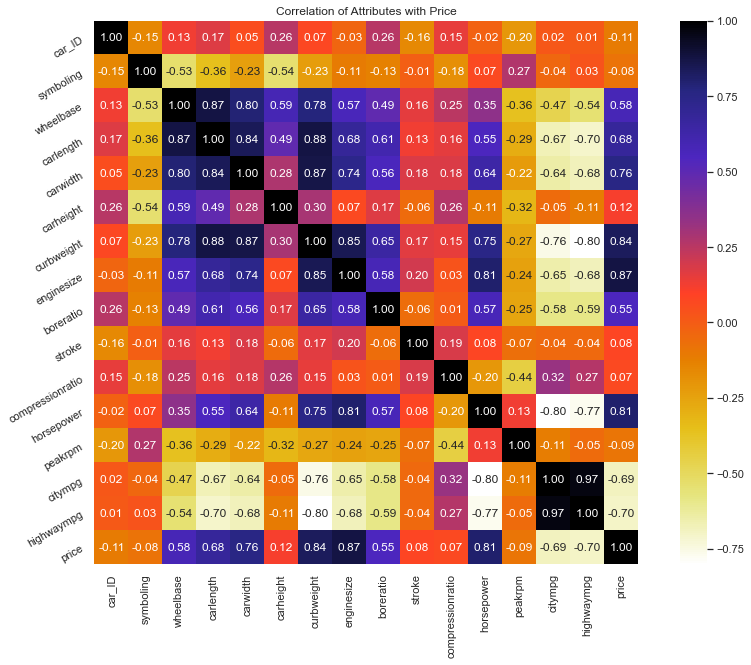

In [531]:
plt.figure(figsize=(15,10))
plt.title('Correlation of Attributes with Price')
a = sns.heatmap(cars.corr(), square=True, annot=True, fmt='.2f', cmap=plt.cm.CMRmap_r)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()


#### checking correlation based on dependent data "price"

In [532]:
correlation = cars.corr()[['price']].sort_values(by='price',ascending = False)

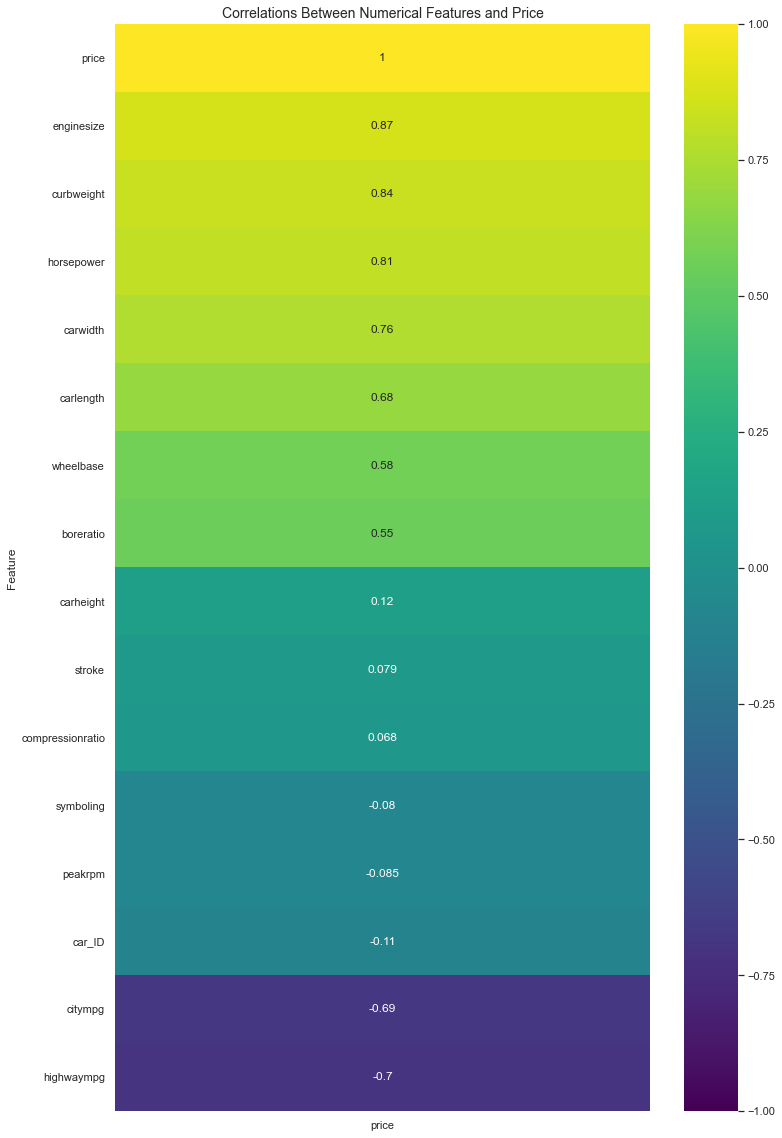

In [533]:
plt.figure(figsize=(12, 20))
sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

### Dropping "car_ID", "peakrpm", "symboling", "compressionratio", "stroke" columns since they have very less correlation with price  and proceeding with enginesize, curbweight, horsepower, carwidth, carlength, highwaympg, citympg, boreratio, wheelbase, price, carheight

In [556]:
cars_data = cars.drop(columns=["car_ID", "peakrpm", "symboling", "compressionratio", "stroke"])

### Checking for Outliers

#### we can able to observe outliers from the numerical columns of the dataset

<AxesSubplot:xlabel='price'>

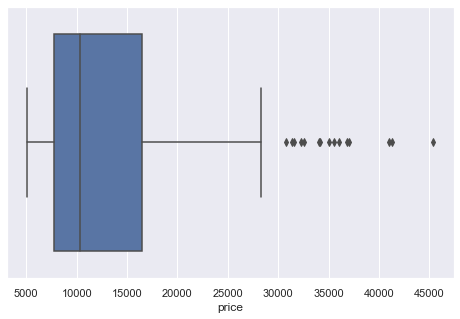

In [527]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.boxplot(cars['price'])

<AxesSubplot:xlabel='highwaympg'>

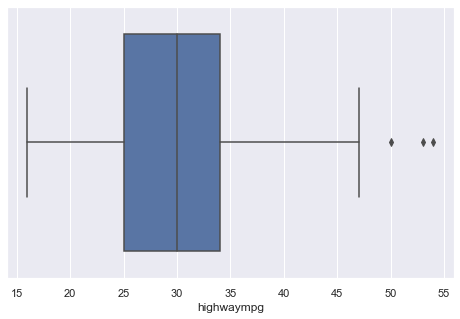

In [528]:
sns.boxplot(cars['highwaympg'],)

In [557]:
numeric = [col for col in cars_data.columns if cars_data[col].dtype!='O']
numeric

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [558]:
cars_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,2548,dohc,four,130,mpfi,3.4700,111,21,27,"13,495.0000"
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,2548,dohc,four,130,mpfi,3.4700,111,21,27,"16,500.0000"
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,...,2823,ohcv,six,152,mpfi,2.6800,154,19,26,"16,500.0000"
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,...,2337,ohc,four,109,mpfi,3.1900,102,24,30,"13,950.0000"
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,...,2824,ohc,five,136,mpfi,3.1900,115,18,22,"17,450.0000"


### So checking for skewness and kurtosis

In [559]:
pd.DataFrame(cars_data.skew(),columns=['skewness'])

,skewness
wheelbase,1.0502
carlength,0.1560
carwidth,0.9040
carheight,0.0631
curbweight,0.6814
enginesize,1.9477
boreratio,0.0202
horsepower,1.4053
citympg,0.6637
highwaympg,0.5400


In [560]:
cars_data.kurtosis()

wheelbase     1.0170
carlength    -0.0829
carwidth      0.7028
carheight    -0.4438
curbweight   -0.0429
enginesize    5.3057
boreratio    -0.7850
horsepower    2.6840
citympg       0.5786
highwaympg    0.4401
price         3.0516
dtype: float64

### Visual data viewing with boxplot and kde for outliers

Text(0, 0.5, 'wheelbase')

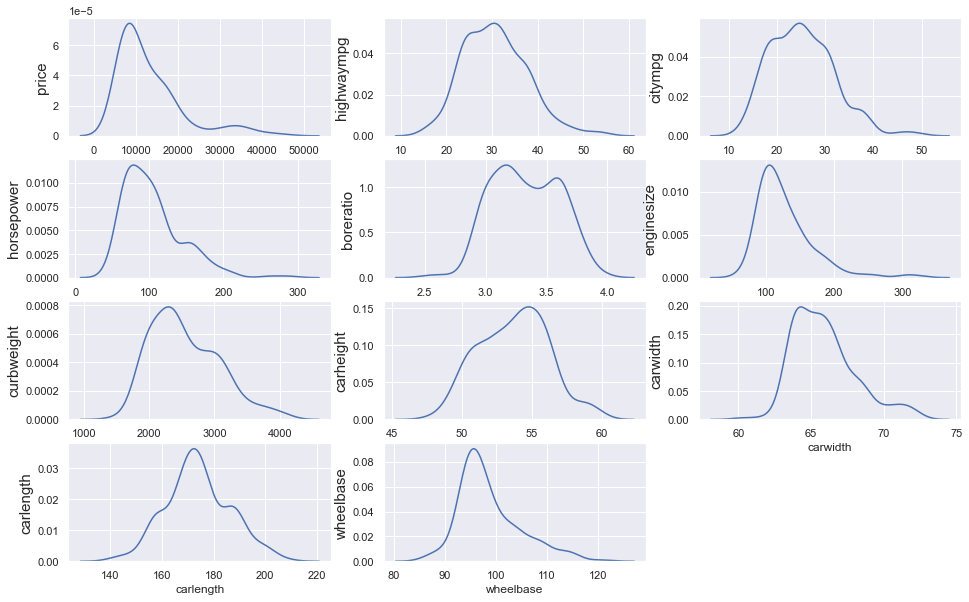

In [561]:
#kdeplot
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(4,3,1)
sns.kdeplot(data=cars_data, x='price' , ax=ax1)
ax1.set_ylabel('price', fontsize = 15)


ax2 = fig.add_subplot(4,3,2)
sns.kdeplot(data = cars_data, x = 'highwaympg', ax=ax2)
ax2.set_ylabel('highwaympg', fontsize = 15)


ax3 = fig.add_subplot(4,3,3)
sns.kdeplot(data = cars_data, x = 'citympg', ax=ax3)
ax3.set_ylabel ('citympg', fontsize = 15)


ax4 = fig.add_subplot(4,3,4)
sns.kdeplot(data = cars_data, x = 'horsepower', ax=ax4)
ax4.set_ylabel ('horsepower', fontsize = 15)


ax5 = fig.add_subplot(4,3,5)
sns.kdeplot(data = cars_data, x = 'boreratio', ax=ax5)
ax5.set_ylabel ('boreratio', fontsize = 15)


ax6 = fig.add_subplot(4,3,6)
sns.kdeplot(data = cars_data, x = 'enginesize', ax=ax6)
ax6.set_ylabel ('enginesize', fontsize = 15)


ax7 = fig.add_subplot(4,3,7)
sns.kdeplot(data = cars_data, x = 'curbweight', ax=ax7)
ax7.set_ylabel ('curbweight', fontsize = 15)


ax8 = fig.add_subplot(4,3,8)
sns.kdeplot(data = cars_data, x = 'carheight', ax=ax8)
ax8.set_ylabel ('carheight', fontsize = 15)


ax9 = fig.add_subplot(4,3,9)
sns.kdeplot(data = cars_data, x = 'carwidth', ax=ax9)
ax9.set_ylabel ('carwidth', fontsize = 15)


ax10 = fig.add_subplot(4,3,10)
sns.kdeplot(data = cars_data, x = 'carlength', ax=ax10)
ax10.set_ylabel ('carlength', fontsize = 15)


ax11 = fig.add_subplot(4,3,11)
sns.kdeplot(data = cars_data, x = 'wheelbase', ax=ax11)
ax11.set_ylabel ('wheelbase', fontsize = 15)


Text(0, 0.5, 'wheelbase')

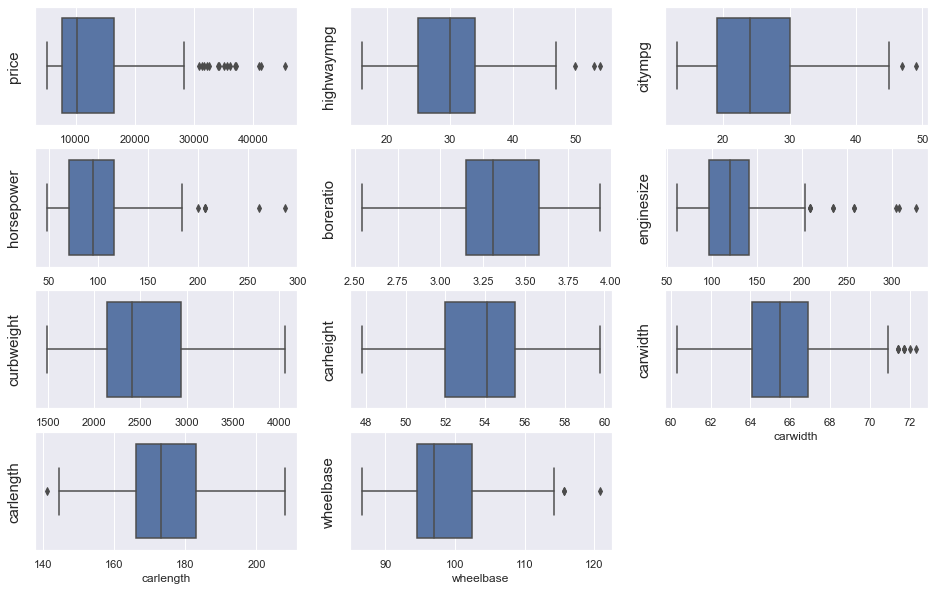

In [562]:
# boxplot
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(4,3,1)
sns.boxplot(data = cars_data, x = 'price' , ax=ax1)
ax1.set_ylabel('price', fontsize = 15)


ax2 = fig.add_subplot(4,3,2)
sns.boxplot(data = cars_data, x = 'highwaympg', ax=ax2)
ax2.set_ylabel('highwaympg', fontsize = 15)


ax3 = fig.add_subplot(4,3,3)
sns.boxplot(data = cars_data, x = 'citympg', ax=ax3)
ax3.set_ylabel ('citympg', fontsize = 15)


ax4 = fig.add_subplot(4,3,4)
sns.boxplot(data = cars_data, x = 'horsepower', ax=ax4)
ax4.set_ylabel ('horsepower', fontsize = 15)


ax5 = fig.add_subplot(4,3,5)
sns.boxplot(data = cars_data, x = 'boreratio', ax=ax5)
ax5.set_ylabel ('boreratio', fontsize = 15)


ax6 = fig.add_subplot(4,3,6)
sns.boxplot(data = cars_data, x = 'enginesize', ax=ax6)
ax6.set_ylabel ('enginesize', fontsize = 15)


ax7 = fig.add_subplot(4,3,7)
sns.boxplot(data = cars_data, x = 'curbweight', ax=ax7)
ax7.set_ylabel ('curbweight', fontsize = 15)


ax8 = fig.add_subplot(4,3,8)
sns.boxplot(data = cars_data, x = 'carheight', ax=ax8)
ax8.set_ylabel ('carheight', fontsize = 15)


ax9 = fig.add_subplot(4,3,9)
sns.boxplot(data = cars_data, x = 'carwidth', ax=ax9)
ax9.set_ylabel ('carwidth', fontsize = 15)


ax10 = fig.add_subplot(4,3,10)
sns.boxplot(data = cars_data, x = 'carlength', ax=ax10)
ax10.set_ylabel ('carlength', fontsize = 15)


ax11 = fig.add_subplot(4,3,11)
sns.boxplot(data = cars_data, x = 'wheelbase', ax=ax11)
ax11.set_ylabel ('wheelbase', fontsize = 15)


#### Since skewness, kurtosis, bloxplot indicates the data has visibly skewed and has outliers
#### we first imply Outlier treatment for the data using IQR

In [563]:
Q1=cars_data.quantile(0.25)
Q3=cars_data.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)

wheelbase       94.5000
carlength      166.3000
carwidth        64.1000
carheight       52.0000
curbweight   2,145.0000
enginesize      97.0000
boreratio        3.1500
horsepower      70.0000
citympg         19.0000
highwaympg      25.0000
price        7,788.0000
Name: 0.25, dtype: float64
wheelbase       102.4000
carlength       183.1000
carwidth         66.9000
carheight        55.5000
curbweight    2,935.0000
enginesize      141.0000
boreratio         3.5800
horsepower      116.0000
citympg          30.0000
highwaympg       34.0000
price        16,503.0000
Name: 0.75, dtype: float64


In [564]:
cars_data = cars_data[~((cars_data < (Q1 - 1.5 * IQR)) |(cars_data > (Q3 + 1.5 * IQR))).any(axis=1)]
cars_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,2548,dohc,four,130,mpfi,3.4700,111,21,27,"13,495.0000"
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,2548,dohc,four,130,mpfi,3.4700,111,21,27,"16,500.0000"
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,...,2823,ohcv,six,152,mpfi,2.6800,154,19,26,"16,500.0000"
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,...,2337,ohc,four,109,mpfi,3.1900,102,24,30,"13,950.0000"
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,...,2824,ohc,five,136,mpfi,3.1900,115,18,22,"17,450.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,...,2952,ohc,four,141,mpfi,3.7800,114,23,28,"16,845.0000"
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,...,3049,ohc,four,141,mpfi,3.7800,160,19,25,"19,045.0000"
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,...,3012,ohcv,six,173,mpfi,3.5800,134,18,23,"21,485.0000"
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,...,3217,ohc,six,145,idi,3.0100,106,26,27,"22,470.0000"


#### Checking for the outliers again if any

Text(0, 0.5, 'wheelbase')

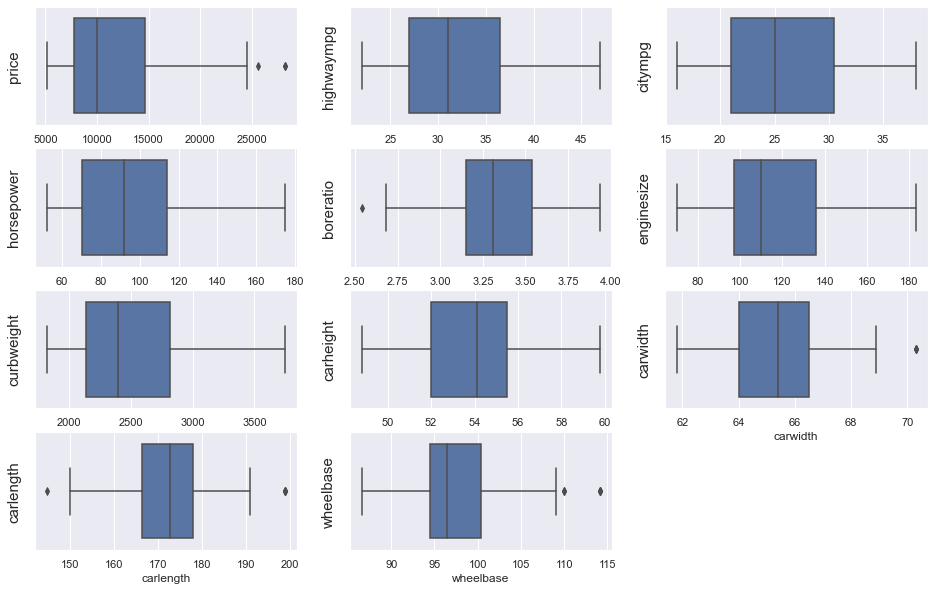

In [565]:
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(4,3,1)
sns.boxplot(data = cars_data, x = 'price' , ax=ax1)
ax1.set_ylabel('price', fontsize = 15)


ax2 = fig.add_subplot(4,3,2)
sns.boxplot(data = cars_data, x = 'highwaympg', ax=ax2)
ax2.set_ylabel('highwaympg', fontsize = 15)


ax3 = fig.add_subplot(4,3,3)
sns.boxplot(data = cars_data, x = 'citympg', ax=ax3)
ax3.set_ylabel ('citympg', fontsize = 15)


ax4 = fig.add_subplot(4,3,4)
sns.boxplot(data = cars_data, x = 'horsepower', ax=ax4)
ax4.set_ylabel ('horsepower', fontsize = 15)


ax5 = fig.add_subplot(4,3,5)
sns.boxplot(data = cars_data, x = 'boreratio', ax=ax5)
ax5.set_ylabel ('boreratio', fontsize = 15)


ax6 = fig.add_subplot(4,3,6)
sns.boxplot(data = cars_data, x = 'enginesize', ax=ax6)
ax6.set_ylabel ('enginesize', fontsize = 15)


ax7 = fig.add_subplot(4,3,7)
sns.boxplot(data = cars_data, x = 'curbweight', ax=ax7)
ax7.set_ylabel ('curbweight', fontsize = 15)


ax8 = fig.add_subplot(4,3,8)
sns.boxplot(data = cars_data, x = 'carheight', ax=ax8)
ax8.set_ylabel ('carheight', fontsize = 15)


ax9 = fig.add_subplot(4,3,9)
sns.boxplot(data = cars_data, x = 'carwidth', ax=ax9)
ax9.set_ylabel ('carwidth', fontsize = 15)


ax10 = fig.add_subplot(4,3,10)
sns.boxplot(data = cars_data, x = 'carlength', ax=ax10)
ax10.set_ylabel ('carlength', fontsize = 15)


ax11 = fig.add_subplot(4,3,11)
sns.boxplot(data = cars_data, x = 'wheelbase', ax=ax11)
ax11.set_ylabel ('wheelbase', fontsize = 15)

### Since we could see little skewness, we imply outlier management, replacing with 0.05 and 0.95 percentile values

In [566]:
print(cars_data['price'].quantile(0.95))
print(cars_data['price'].skew())

20777.50000000001
1.0769609371782811


In [567]:
cars_data['price'] = np.where(cars_data['price'] > 20777.50, 20777.50, cars_data['price'])
print(cars_data['price'].skew())

0.6808674312115687


In [568]:
print(cars_data['boreratio'].quantile(0.05))

2.97


In [569]:
cars_data['boreratio'] = np.where(cars_data['boreratio'] < 2.97, 2.97, cars_data['boreratio'])
print(cars_data['boreratio'].skew())

0.26627758351795505


In [570]:
print(cars_data['carwidth'].quantile(0.95))
print(cars_data['carwidth'].skew())

68.4
0.5988246267746391


In [571]:
cars_data['carwidth'] = np.where(cars_data['carwidth'] > 68.4, 68.4, cars_data['carwidth'])
print(cars_data['carwidth'].skew())

0.34601387425122065


In [572]:
print(cars_data['carlength'].quantile(0.05))
print(cars_data['carlength'].quantile(0.95))
print(cars_data['carlength'].skew())

157.3
188.8
0.06215135500575112


In [574]:
print(cars_data['wheelbase'].quantile(0.20))
print(cars_data['wheelbase'].quantile(0.80))
print(cars_data['wheelbase'].skew())

94.5
102.4
1.1081395655928155


In [575]:
cars_data['wheelbase'] = np.where(cars_data['wheelbase'] < 94.5, 94.5, cars_data['wheelbase'])
cars_data['wheelbase'] = np.where(cars_data['wheelbase'] > 102.4, 102.4, cars_data['wheelbase'])
print(cars_data['wheelbase'].skew())

0.500612422784062


Text(0, 0.5, 'wheelbase')

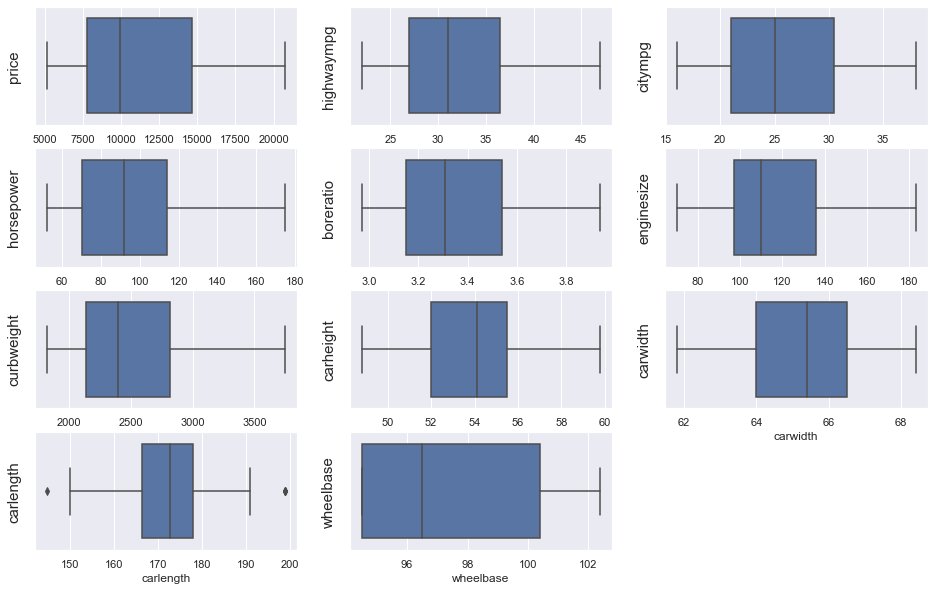

In [576]:
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(4,3,1)
sns.boxplot(data = cars_data, x = 'price' , ax=ax1)
ax1.set_ylabel('price', fontsize = 15)


ax2 = fig.add_subplot(4,3,2)
sns.boxplot(data = cars_data, x = 'highwaympg', ax=ax2)
ax2.set_ylabel('highwaympg', fontsize = 15)


ax3 = fig.add_subplot(4,3,3)
sns.boxplot(data = cars_data, x = 'citympg', ax=ax3)
ax3.set_ylabel ('citympg', fontsize = 15)


ax4 = fig.add_subplot(4,3,4)
sns.boxplot(data = cars_data, x = 'horsepower', ax=ax4)
ax4.set_ylabel ('horsepower', fontsize = 15)


ax5 = fig.add_subplot(4,3,5)
sns.boxplot(data = cars_data, x = 'boreratio', ax=ax5)
ax5.set_ylabel ('boreratio', fontsize = 15)


ax6 = fig.add_subplot(4,3,6)
sns.boxplot(data = cars_data, x = 'enginesize', ax=ax6)
ax6.set_ylabel ('enginesize', fontsize = 15)


ax7 = fig.add_subplot(4,3,7)
sns.boxplot(data = cars_data, x = 'curbweight', ax=ax7)
ax7.set_ylabel ('curbweight', fontsize = 15)


ax8 = fig.add_subplot(4,3,8)
sns.boxplot(data = cars_data, x = 'carheight', ax=ax8)
ax8.set_ylabel ('carheight', fontsize = 15)


ax9 = fig.add_subplot(4,3,9)
sns.boxplot(data = cars_data, x = 'carwidth', ax=ax9)
ax9.set_ylabel ('carwidth', fontsize = 15)


ax10 = fig.add_subplot(4,3,10)
sns.boxplot(data = cars_data, x = 'carlength', ax=ax10)
ax10.set_ylabel ('carlength', fontsize = 15)


ax11 = fig.add_subplot(4,3,11)
sns.boxplot(data = cars_data, x = 'wheelbase', ax=ax11)
ax11.set_ylabel ('wheelbase', fontsize = 15)

In [577]:
cars_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,94.5000,168.8000,64.1000,...,2548,dohc,four,130,mpfi,3.4700,111,21,27,"13,495.0000"
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,94.5000,168.8000,64.1000,...,2548,dohc,four,130,mpfi,3.4700,111,21,27,"16,500.0000"
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,...,2823,ohcv,six,152,mpfi,2.9700,154,19,26,"16,500.0000"
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,...,2337,ohc,four,109,mpfi,3.1900,102,24,30,"13,950.0000"
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,...,2824,ohc,five,136,mpfi,3.1900,115,18,22,"17,450.0000"


## Exploring categorical variables

In [596]:
# finding categorical variables

categorical = [col for col in cars_data.columns if cars[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 10 categorical variables


In [597]:
# view the categorical variables

print(categorical)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [598]:
cars_data[categorical].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### checking for value counts

In [599]:
cars_data['CarName'].nunique()

129

In [600]:
cars_data['fueltype'].value_counts()

gas       165
diesel     18
Name: fueltype, dtype: int64

In [602]:
cars_data['aspiration'].value_counts()

std      149
turbo     34
Name: aspiration, dtype: int64

In [603]:
cars_data['doornumber'].value_counts()

four    105
two      78
Name: doornumber, dtype: int64

In [604]:
cars_data['carbody'].value_counts()

sedan          84
hatchback      66
wagon          24
hardtop         5
convertible     4
Name: carbody, dtype: int64

In [605]:
cars_data['drivewheel'].value_counts()

fwd    114
rwd     60
4wd      9
Name: drivewheel, dtype: int64

In [608]:
cars_data['enginelocation'].value_counts()

front    183
Name: enginelocation, dtype: int64

In [609]:
cars_data['enginetype'].value_counts()

ohc      139
ohcf      12
l         11
dohc      10
ohcv       7
rotor      4
Name: enginetype, dtype: int64

In [610]:
cars_data['cylindernumber'].value_counts()

four    157
six      15
five      7
two       4
Name: cylindernumber, dtype: int64

In [611]:
cars_data['fuelsystem'].value_counts()

mpfi    76
2bbl    65
idi     18
1bbl    10
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

### Checking for relationship between fueltype, enginesize and price using hist and kdeplot

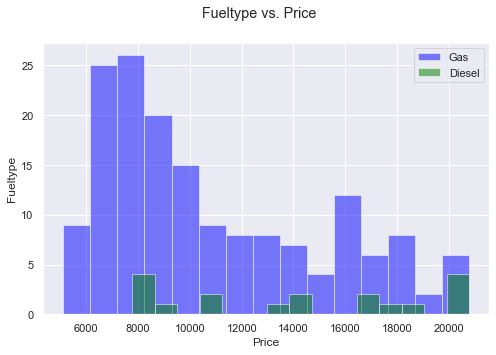

In [612]:
fig, ax = plt.subplots()

ax.hist(cars_data["price"][cars_data["fueltype"]=="gas"], bins=15, alpha=0.5, color="blue", label="Gas")
ax.hist(cars_data["price"][cars_data["fueltype"]=="diesel"], bins=15, alpha=0.5, color="green", label="Diesel")

ax.set_xlabel("Price")
ax.set_ylabel("Fueltype")

fig.suptitle("Fueltype vs. Price")

ax.legend();

<AxesSubplot:xlabel='price', ylabel='Density'>

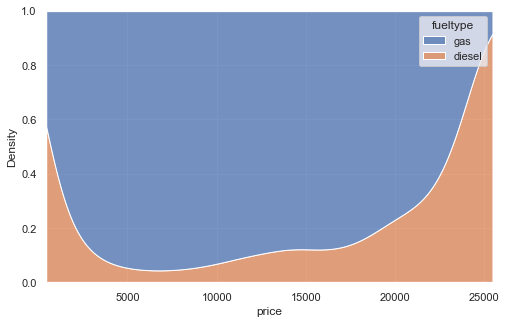

In [613]:
sns.kdeplot(data=cars_data, x="price", hue="fueltype", multiple="fill")

<AxesSubplot:xlabel='price', ylabel='enginesize'>

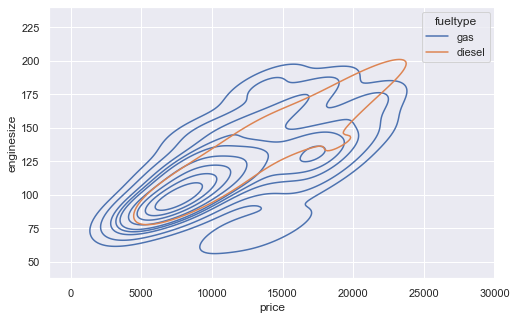

In [614]:
sns.kdeplot(data=cars_data, x="price", y="enginesize", hue="fueltype")

#### to see relationship between 'enginetype', 'carbody', 'cylindernumber' with 'price' using subplot and boxplot

Text(0.5, 0, 'cylindernumber')

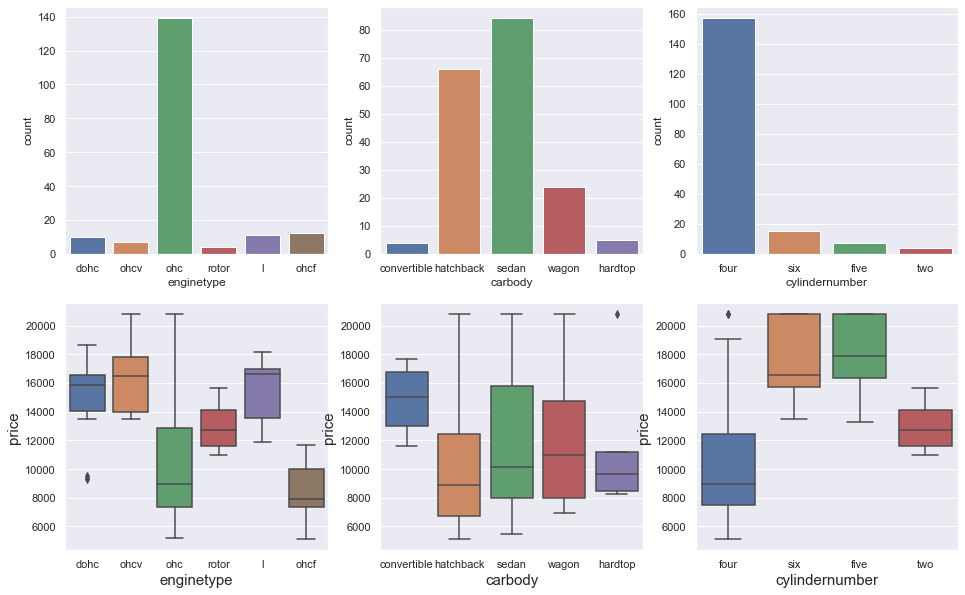

In [615]:
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = cars_data, x = 'enginetype', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = cars_data, x = 'carbody', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = cars_data, x = 'cylindernumber', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = cars_data, x = 'enginetype', y = 'price' , ax=ax4)
ax4.set_ylabel('price', fontsize = 15)
ax4.set_xlabel ('enginetype', fontsize = 15)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = cars_data, x = 'carbody', y = 'price', ax=ax5)
ax5.set_ylabel('price', fontsize = 15)
ax5.set_xlabel ('carbody', fontsize = 15)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = cars_data, x = 'cylindernumber', y = 'price', ax=ax6)
ax6.set_ylabel('price', fontsize = 15)
ax6.set_xlabel ('cylindernumber', fontsize = 15)


### checking 'drivewheel', 'carbody' with 'price' using groupby and pivot

In [616]:
test = cars_data[['drivewheel', 'carbody', 'price']]
data_grp = test.groupby(['drivewheel', 'carbody'], 
                         as_index = False).max()

In [617]:
data_grp

,drivewheel,carbody,price
0,4wd,hatchback,"17,859.1670"
1,4wd,sedan,"17,450.0000"
2,4wd,wagon,"11,694.0000"
3,fwd,convertible,"11,595.0000"
4,fwd,hardtop,"8,249.0000"
5,fwd,hatchback,"18,150.0000"
6,fwd,sedan,"18,620.0000"
7,fwd,wagon,"14,399.0000"
8,rwd,convertible,"17,669.0000"
9,rwd,hardtop,"20,777.5000"


In [618]:
data_pivot = data_grp.pivot(index = 'drivewheel',
                            columns = 'carbody')
data_pivot

price                                                
carbody    convertible     hardtop   hatchback       sedan       wagon
drivewheel                                                            
4wd                nan         nan 17,859.1670 17,450.0000 11,694.0000
fwd        11,595.0000  8,249.0000 18,150.0000 18,620.0000 14,399.0000
rwd        17,669.0000 20,777.5000 20,777.5000 20,777.5000 20,777.5000

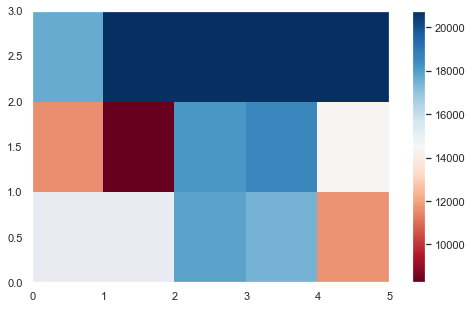

In [619]:
# heatmap for visualizing data
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

In [620]:
cars_data[categorical].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Extracting cars details  to club the cars into groups

In [621]:
# Checking for unique car names and instances
print('Number of unique Model Names: ', len(cars_data['CarName'].unique()))
print('Number  of instances of models: ', len(cars_data))

Number of unique Model Names:  129
Number  of instances of models:  183


In [622]:
# Exacting car names
cars_data['CarMake'] = cars_data['CarName'].str.extract(r'([A-Za-z-]+\s)', expand=False).str.strip()

In [624]:
cars_data['CarMake'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', nan, 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [625]:
# Cleaning misspelled toyota name
cars_data['CarMake'] = cars_data['CarMake'].str.replace("toyouta","toyota")

In [626]:
cars_data['CarMake'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', nan, 'subaru', 'toyota', 'vokswagen', 'volkswagen', 'vw',
       'volvo'], dtype=object)

In [627]:
# Now we have 27 car makes
cars_data['CarMake'].nunique()

25

### Onehot encoding for "CarMake", "drivewheel", "carbody", "fuelsystem" using pandas method

In [ ]:
dummies = pd.get_dummies(cars_data[["CarMake", "drivewheel", "carbody", "fuelsystem"]], prefix=["Make", "drive", "body", "fuel"], drop_first=True).astype(float)
dummies

In [635]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 204
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make_alfa-romero  183 non-null    float64
 1   Make_audi         183 non-null    float64
 2   Make_bmw          183 non-null    float64
 3   Make_buick        183 non-null    float64
 4   Make_chevrolet    183 non-null    float64
 5   Make_dodge        183 non-null    float64
 6   Make_honda        183 non-null    float64
 7   Make_isuzu        183 non-null    float64
 8   Make_maxda        183 non-null    float64
 9   Make_mazda        183 non-null    float64
 10  Make_mercury      183 non-null    float64
 11  Make_mitsubishi   183 non-null    float64
 12  Make_nissan       183 non-null    float64
 13  Make_peugeot      183 non-null    float64
 14  Make_plymouth     183 non-null    float64
 15  Make_porsche      183 non-null    float64
 16  Make_renault      183 non-null    float64
 1

### Label_encoding for 'fueltype' , 'aspiration'

In [638]:
  # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column ''.
cars_data['fueltype']= label_encoder.fit_transform(cars_data['fueltype'])
cars_data['aspiration']= label_encoder.fit_transform(cars_data['aspiration'])
  
print(cars_data['fueltype'].unique())
print(cars_data['aspiration'].unique())

[1 0]
[0 1]


In [640]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 204
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         183 non-null    object 
 1   fueltype        183 non-null    int32  
 2   aspiration      183 non-null    int32  
 3   doornumber      183 non-null    object 
 4   carbody         183 non-null    object 
 5   drivewheel      183 non-null    object 
 6   enginelocation  183 non-null    object 
 7   wheelbase       183 non-null    float64
 8   carlength       183 non-null    float64
 9   carwidth        183 non-null    float64
 10  carheight       183 non-null    float64
 11  curbweight      183 non-null    int64  
 12  enginetype      183 non-null    object 
 13  cylindernumber  183 non-null    object 
 14  enginesize      183 non-null    int64  
 15  fuelsystem      183 non-null    object 
 16  boreratio       183 non-null    float64
 17  horsepower      183 non-null    int

### Find and replace methos for cleaning up the doornumber and cylindernumber columns

In [641]:
convert_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5,
                                  "two": 2}}

In [642]:
cars_data = cars_data.replace(convert_nums)
cars_data[["doornumber","cylindernumber"]]

,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5
...,...,...
200,4,4
201,4,4
202,4,6
203,4,6


### combination of label encoding and one hot encoding for enginetype

In [643]:
cars_data["enginetype"] = np.where(cars_data["enginetype"].str.contains("ohc"), 1, 0)

In [644]:
cars_data["enginetype"].tail()

200    1
201    1
202    1
203    1
204    1
Name: enginetype, dtype: int32

In [645]:
cars_data[categorical]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,1,0,2,convertible,rwd,front,1,4,mpfi
1,alfa-romero stelvio,1,0,2,convertible,rwd,front,1,4,mpfi
2,alfa-romero Quadrifoglio,1,0,2,hatchback,rwd,front,1,6,mpfi
3,audi 100 ls,1,0,4,sedan,fwd,front,1,4,mpfi
4,audi 100ls,1,0,4,sedan,4wd,front,1,5,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),1,0,4,sedan,rwd,front,1,4,mpfi
201,volvo 144ea,1,1,4,sedan,rwd,front,1,4,mpfi
202,volvo 244dl,1,0,4,sedan,rwd,front,1,6,mpfi
203,volvo 246,0,1,4,sedan,rwd,front,1,6,idi


In [646]:
categorical_features = cars_data.select_dtypes(include = 'object').columns.to_list()
categorical_features

['CarName', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'CarMake']

#### dropping encoded original columns from dataframe "enginelocation", "CarName", "CarMake", "drivewheel", "carbody", "fuelsystem"

In [648]:
cars_data = cars_data.drop(columns=["enginelocation", "CarName", "CarMake", "drivewheel", "carbody", "fuelsystem"])

In [649]:
cars_data.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,1,0,2,94.5000,168.8000,64.1000,48.8000,2548,1,4,130,3.4700,111,21,27,"13,495.0000"
1,1,0,2,94.5000,168.8000,64.1000,48.8000,2548,1,4,130,3.4700,111,21,27,"16,500.0000"
2,1,0,2,94.5000,171.2000,65.5000,52.4000,2823,1,6,152,2.9700,154,19,26,"16,500.0000"
3,1,0,4,99.8000,176.6000,66.2000,54.3000,2337,1,4,109,3.1900,102,24,30,"13,950.0000"
4,1,0,4,99.4000,176.6000,66.4000,54.3000,2824,1,5,136,3.1900,115,18,22,"17,450.0000"


In [650]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        183 non-null    int32  
 1   aspiration      183 non-null    int32  
 2   doornumber      183 non-null    int64  
 3   wheelbase       183 non-null    float64
 4   carlength       183 non-null    float64
 5   carwidth        183 non-null    float64
 6   carheight       183 non-null    float64
 7   curbweight      183 non-null    int64  
 8   enginetype      183 non-null    int32  
 9   cylindernumber  183 non-null    int64  
 10  enginesize      183 non-null    int64  
 11  boreratio       183 non-null    float64
 12  horsepower      183 non-null    int64  
 13  citympg         183 non-null    int64  
 14  highwaympg      183 non-null    int64  
 15  price           183 non-null    float64
dtypes: float64(6), int32(3), int64(7)
memory usage: 27.2 KB


### concating encoded dummy variables with data frame

In [651]:
cars_data = pd.concat([cars_data,dummies],axis='columns')
cars_data.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,body_hatchback,body_sedan,body_wagon,fuel_2bbl,fuel_4bbl,fuel_idi,fuel_mfi,fuel_mpfi,fuel_spdi,fuel_spfi
0,1,0,2,94.5000,168.8000,64.1000,48.8000,2548,1,4,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,1,0,2,94.5000,168.8000,64.1000,48.8000,2548,1,4,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,1,0,2,94.5000,171.2000,65.5000,52.4000,2823,1,6,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,1,0,4,99.8000,176.6000,66.2000,54.3000,2337,1,4,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,1,0,4,99.4000,176.6000,66.4000,54.3000,2824,1,5,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


### Exporting the cars_data to 'carsPrice-EDA.csv' for Modelling

In [652]:
cars_data.to_csv('carsPrice-EDA.csv', index=False)

In [653]:
df = pd.read_csv('carsPrice-EDA.csv')

In [654]:
df.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,body_hatchback,body_sedan,body_wagon,fuel_2bbl,fuel_4bbl,fuel_idi,fuel_mfi,fuel_mpfi,fuel_spdi,fuel_spfi
0,1,0,2,94.5000,168.8000,64.1000,48.8000,2548,1,4,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,1,0,2,94.5000,168.8000,64.1000,48.8000,2548,1,4,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,1,0,2,94.5000,171.2000,65.5000,52.4000,2823,1,6,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,1,0,4,99.8000,176.6000,66.2000,54.3000,2337,1,4,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,1,0,4,99.4000,176.6000,66.4000,54.3000,2824,1,5,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
